In [10]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

all_cases = [f"Caso_{i}" for i in range(12)]
missing_cases = []

folder_path = pathlib.Path("./")

delta_p_data = {}
residual_data = {}
outlet_data = {}
inlet_data = {}

for case in all_cases:
    try:
        df = pd.read_csv(folder_path / case / "delta_p.csv")
        delta_p_data[case] = df
        
        df = pd.read_csv(folder_path / case / "result.csv")
        residual_data[case] = df
        
        df = pd.read_csv(folder_path / case / "outlet_probe.csv")
        outlet_data[case] = df
        
        df = pd.read_csv(folder_path / case / "inlet_probe.csv")
        inlet_data[case] = df
    except:
        missing_cases.append(case)
        
missing_cases

['Caso_1',
 'Caso_2',
 'Caso_4',
 'Caso_5',
 'Caso_7',
 'Caso_8',
 'Caso_10',
 'Caso_11']

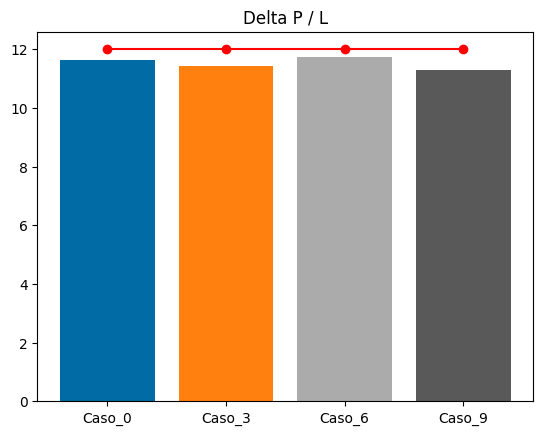

In [11]:
import numpy as np

x = []
y = []

analytic_val = 0

for case, data in delta_p_data.items():
    x.append(case)
    y.append(data["Delta_p_PINN"].iloc[0])
    analytic_val = data["Delta_p_analytic"].iloc[0]
    plt.bar(case, data["Delta_p_PINN"].iloc[0])

plt.title("Delta P / L")
plt.plot(x, np.repeat(analytic_val, len(x)), color="red", marker="o")
plt.show()

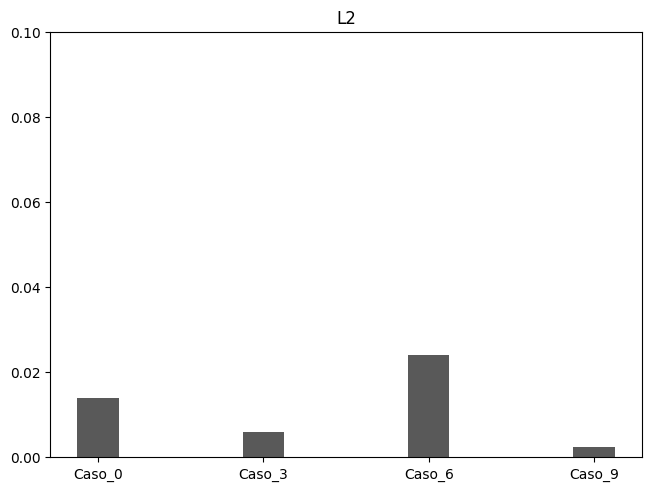

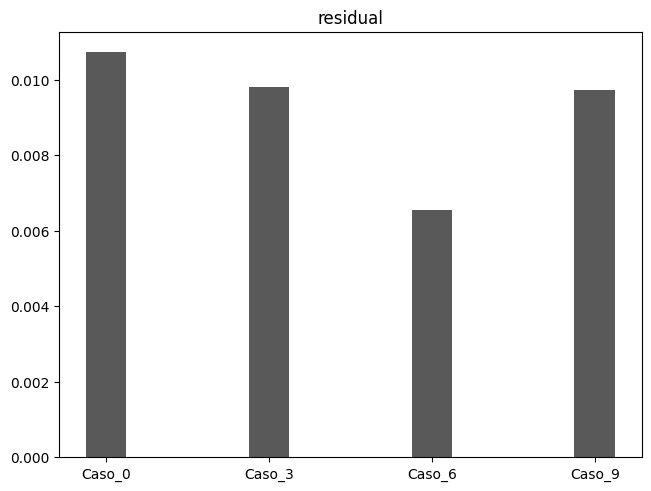

In [12]:
import numpy as np

fig, ax = plt.subplots(layout='constrained')
fig2, ax2 = plt.subplots(layout='constrained')

x = []
l2_diff_u = []
residual = []

anall2_diff_uytic_val = 0

for case, data in residual_data.items():
    x.append(case)
    residual.append(data["residual"].iloc[0])
    l2_diff_u.append(data["l2_diff_u"].iloc[0])

    ax.bar(x, l2_diff_u, 0.25, label="L2")
    ax2.bar(x, residual, 0.25, label="residual")

ax.set_title("L2")
ax2.set_title("residual")
ax.set_ylim([0, 0.1])  
plt.show()

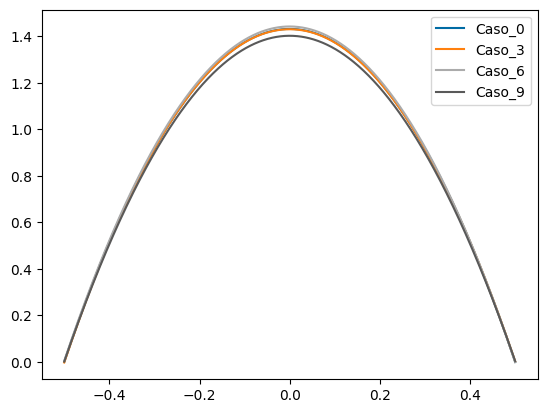

In [13]:
plt.close()

for case, data in outlet_data.items():
    plt.plot(data["Points_y"], data["u"], label=case)

plt.legend()
plt.show()

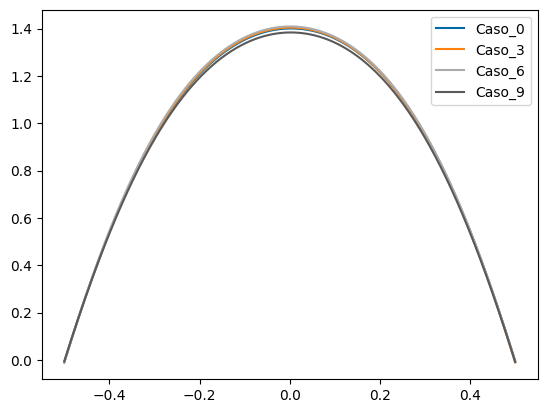

In [14]:
plt.close()

for case, data in inlet_data.items():
    plt.plot(data["Points_y"], data["u"], label=case)

plt.legend()
plt.show()